In [1]:
import numpy as np
import pandas as pd


In [2]:
df= pd.read_csv("data.csv")

df

,Unnamed: 0,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A14CK12J7C7JRK,1223000893,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3.0,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
1,1,A39QHP5WLON5HV,1223000893,"[0, 0]",There are usually one or more of my cats watch...,5.0,Entertaining for my cats,1379116800,"09 14, 2013"
2,2,A2CR37UY3VR7BN,1223000893,"[0, 0]",I bought the triliogy and have tested out all ...,4.0,Entertaining,1355875200,"12 19, 2012"
3,3,A2A4COGL9VW2HY,1223000893,"[2, 2]",My female kitty could care less about these vi...,4.0,Happy to have them,1305158400,"05 12, 2011"
4,4,A2UBQA85NIGLHA,1223000893,"[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,"03 5, 2012"
...,...,...,...,...,...,...,...,...,...
157831,157831,A136YD08SCJ2LV,B00KMHKOZC,"[0, 0]",The Pet Magasin Retractable Dog Leash is the b...,5.0,Perfection,1405296000,"07 14, 2014"
157832,157832,A2YKWYC3WQJX5J,B00KMHKOZC,"[1, 1]",I'm not the biggest fan of retractable leashes...,5.0,"Nice solid feel, my little boy is thrilled!",1405296000,"07 14, 2014"
157833,157833,A2K0D19N83G6U2,B00KMHKOZC,"[0, 0]",I was provided a leash for my unbiased review....,4.0,Good leash for small non-darty pets,1405987200,"07 22, 2014"
157834,157834,A3A4ZAIBQWKOZS,B00KMHKOZC,"[1, 1]",This is a well designed leash that offers the ...,5.0,"Quality build, smooth retraction, great leash",1405641600,"07 18, 2014"


In [3]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = " ".join(text)
  return(text)

In [4]:
df["review_processed"] = df["reviewText"].apply(lambda x:preprocess(str(x)))
df["review_processed"]=df["review_processed"].apply(lambda x:x.split())

In [5]:
dogs = []
for i in range(len(df)):
    if ('dog' in df["review_processed"][i] or 'dogs' in df["review_processed"][i] or 'puppy' in df["review_processed"][i] or 'puppies' in df["review_processed"][i] 
        or 'doggy' in df["review_processed"][i] or 'doggies' in df["review_processed"][i] == True):
        dogs.append(i)
dogs

[4,
 6,
 7,
 8,
 10,
 11,
 13,
 15,
 16,
 17,
 19,
 20,
 21,
 27,
 28,
 29,
 31,
 36,
 40,
 57,
 90,
 93,
 146,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 179,
 180,
 182,
 183,
 184,
 185,
 186,
 188,
 189,
 190,
 191,
 192,
 193,
 195,
 196,
 197,
 200,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 217,
 219,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 265,
 266,
 267,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 287,
 288,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 318,
 320,
 321,
 322,
 323,
 324,
 326,
 327,
 328,


In [6]:
dogData = df.iloc[dogs]

dogData.head()

,Unnamed: 0,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_processed
4,4,A2UBQA85NIGLHA,1223000893,"[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,"03 5, 2012","[gotten, just, volume, given, stars, got, tril..."
6,6,A2R4JCEFLTFU8F,4847676011,"[2, 2]",My puppy loves this stuff! His tail starts wag...,5.0,Naturally Yummy!,1384560000,"11 16, 2013","[puppy, loves, stuff, tail, starts, wagging, s..."
7,7,A14B4MJ7KZE63B,4847676011,"[2, 2]",My toy poodle loves this stuff and will let me...,4.0,bought to help with dog breath,1394323200,"03 9, 2014","[toy, poodle, loves, stuff, let, sort, brush, ..."
8,8,A2JDB26Y78TT8Z,4847676011,"[0, 0]",Works great and dog doesn't hate the taste. G...,5.0,Brushing those teeth isn't so hard with this d...,1384819200,"11 19, 2013","[works, great, dog, doesnt, hate, taste, gum, ..."
10,10,A1OXLCCN5XF21I,9376674824,"[5, 7]",my dog like his kibbles more than treats (he L...,2.0,my puppy wont eat his food,1302307200,"04 9, 2011","[dog, like, kibbles, treats, loves, eat, sprin..."


# Preprocessing

In [10]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dog","dogs","use","like","just","used","great","good"
                                      ]] #remove task specific stopwords
  text = " ".join(text)
  return(text)

In [12]:
# get the dog related dataset

dogData["review_processed"] = dogData["reviewText"].apply(lambda x:preprocess(str(x)))
dogData["review_processed"]=dogData["review_processed"].apply(lambda x:x.split())

dogData.head(5)

/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/610325684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogData["review_processed"] = dogData["reviewText"].apply(lambda x:preprocess(str(x)))
/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/610325684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogData["review_processed"]=dogData["review_processed"].apply(lambda x:x.split())


,Unnamed: 0,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_processed,year,month
4,4,A2UBQA85NIGLHA,1223000893,"[6, 7]","If I had gotten just volume two, I would have ...",3.0,You really only need vol 2,1330905600,2012-03-05,"[gotten, volume, given, stars, got, trilogy, s...",2012,3
6,6,A2R4JCEFLTFU8F,4847676011,"[2, 2]",My puppy loves this stuff! His tail starts wag...,5.0,Naturally Yummy!,1384560000,2013-11-16,"[puppy, loves, stuff, tail, starts, wagging, s...",2013,11
7,7,A14B4MJ7KZE63B,4847676011,"[2, 2]",My toy poodle loves this stuff and will let me...,4.0,bought to help with dog breath,1394323200,2014-03-09,"[toy, poodle, loves, stuff, let, sort, brush, ...",2014,3
8,8,A2JDB26Y78TT8Z,4847676011,"[0, 0]",Works great and dog doesn't hate the taste. G...,5.0,Brushing those teeth isn't so hard with this d...,1384819200,2013-11-19,"[works, doesnt, hate, taste, gum, health, impo...",2013,11
10,10,A1OXLCCN5XF21I,9376674824,"[5, 7]",my dog like his kibbles more than treats (he L...,2.0,my puppy wont eat his food,1302307200,2011-04-09,"[kibbles, treats, loves, eat, sprinkled, foodh...",2011,4


## Date

In [13]:
dogData['reviewTime']=pd.to_datetime(dogData['reviewTime'])
dogData['year']=dogData['reviewTime'].dt.year
dogData['month']=dogData['reviewTime'].dt.month

/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/3247721255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogData['reviewTime']=pd.to_datetime(dogData['reviewTime'])
/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/3247721255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogData['year']=dogData['reviewTime'].dt.year
/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/3247721255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

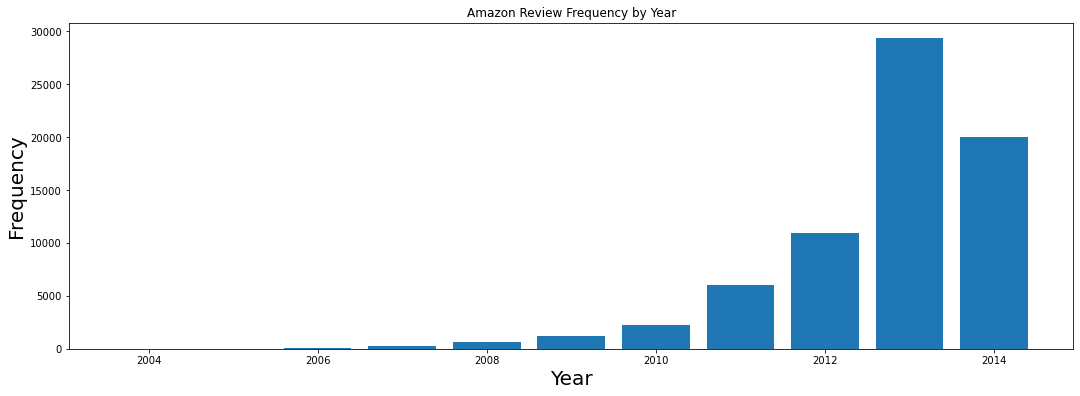

In [14]:
import pandas as pd  
import matplotlib.pyplot as plot

# create a figure and axis
# set size
figure, axis = plot.subplots(figsize = (18, 6))

# count the occurrence of each year
count_data = dogData["year"].value_counts()

# get the x and y data

# x axis data
points = count_data.index

# y axis data
frequencies = count_data.values

# create the bar chart
axis.bar(points, frequencies)

# set the title and labels
axis.set_title ("Amazon Review Frequency by Year")
axis.set_xlabel ("Year")
axis.set_ylabel ("Frequency")
axis. xaxis. label. set_size(20)
axis. yaxis. label. set_size(20)

# Topic Model

In [15]:
from gensim import corpora

dictionary = corpora.Dictionary(dogData["review_processed"]) 
dictionary.filter_extremes(no_below=50)

dictionaryDF = pd.DataFrame()
dictionaryDF['id']=dictionary.keys()
dictionaryDF['word']=dictionary.values()

dictionary = corpora.Dictionary(dogData["review_processed"])
dogData["review_processed"]=dogData["review_processed"].apply(lambda x:dictionary.doc2bow(x))

from gensim import models
num_topics= 3
#how many topics
ldamodel = models.ldamodel.LdaModel(dogData["review_processed"], num_topics = num_topics, id2word=dictionary, passes=1, random_state=100)
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/642183449.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogData["review_processed"]=dogData["review_processed"].apply(lambda x:dictionary.doc2bow(x))


(0, '0.006*"leash" + 0.006*"collar" + 0.006*"small" + 0.006*"little" + 0.006*"easy" + 0.006*"really"')
(1, '0.026*"food" + 0.009*"product" + 0.007*"eat" + 0.007*"bag" + 0.006*"ingredients" + 0.006*"chicken"')
(2, '0.024*"treats" + 0.014*"toy" + 0.014*"loves" + 0.012*"treat" + 0.011*"love" + 0.011*"chew"')


# Sentiment Analysis & Word2Vec Models

In [22]:
#all dog data
from gensim.models.word2vec import Word2Vec

model=Word2Vec.load('allData.w2v')

In [23]:
#get sentiments 
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_positivity(row):
    text = row['reviewText']
    return sia.polarity_scores(text)['pos']

def get_negativity(row):
    text = row['reviewText']
    return sia.polarity_scores(text)['neg']

In [24]:
dogData['positivity'] = dogData.apply(lambda row : get_positivity(row), axis = 1)

/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/1734369771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogData['positivity'] = dogData.apply(lambda row : get_positivity(row), axis = 1)


In [25]:
dogData['negativity'] = dogData.apply(lambda row : get_negativity(row), axis = 1)

/var/folders/1z/xqn19h_x6y7bdg8t43_026fm0000gn/T/ipykernel_3232/1035897099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogData['negativity'] = dogData.apply(lambda row : get_negativity(row), axis = 1)


In [26]:
pos = []
neg = []
for row in dogData.index:
    if dogData["positivity"][row] >= dogData["negativity"][row]:
        pos.append(row)
    else:
        neg.append(row)

In [27]:
posData = dogData.loc[pos]

In [28]:
negData = dogData.loc[neg]

In [31]:
#positive dog data
model2=Word2Vec.load('posData.w2v')

In [32]:
#negative dog data
model3=Word2Vec.load('negData.w2v')

## General findings

### Health / Issues

In [1]:
model.wv.most_similar('health', topn=20)

NameError: name 'model' is not defined

In [ ]:
model.wv.most_similar('issues', topn=20)

### Food / Treat

In [18]:
model.wv.most_similar('food', topn=20)

[('foods', 0.8607029318809509),
 ('canned', 0.823520302772522),
 ('feed', 0.7764318585395813),
 ('kibble', 0.774937629699707),
 ('beneful', 0.7684417963027954),
 ('foodi', 0.7581843137741089),
 ('iams', 0.7314141988754272),
 ('nutrience', 0.7290564179420471),
 ('grainfree', 0.7245274782180786),
 ('wellness', 0.718381404876709),
 ('feeding', 0.7177774310112),
 ('kibbles', 0.6995685696601868),
 ('grain', 0.689814567565918),
 ('merrick', 0.6772351264953613),
 ('fed', 0.6719245314598083),
 ('science', 0.6700250506401062),
 ('diet', 0.6657546758651733),
 ('eat', 0.6642017364501953),
 ('orijen', 0.6616511940956116),
 ('dry', 0.65117347240448)]

In [19]:
model.wv.most_similar('foods', topn=20)

[('food', 0.8607029914855957),
 ('grainfree', 0.7718530893325806),
 ('canned', 0.7538586854934692),
 ('grains', 0.7461742758750916),
 ('grain', 0.7428746819496155),
 ('iams', 0.7360897660255432),
 ('beneful', 0.7292384505271912),
 ('wellness', 0.7248213291168213),
 ('ingredients', 0.7212700247764587),
 ('diet', 0.7194106578826904),
 ('fillers', 0.7178388237953186),
 ('merrick', 0.7091771960258484),
 ('nutrience', 0.7026435136795044),
 ('foodi', 0.6976250410079956),
 ('feed', 0.6911323666572571),
 ('nutrition', 0.6829206347465515),
 ('science', 0.6794840693473816),
 ('protein', 0.6692298650741577),
 ('nutritious', 0.6556248068809509),
 ('meat', 0.6538680791854858)]

In [20]:
model.wv.most_similar('treat', topn=20)

[('treats', 0.8329103589057922),
 ('snack', 0.7196111679077148),
 ('biscuit', 0.6842326521873474),
 ('yummy', 0.6677627563476562),
 ('reward', 0.6553356051445007),
 ('tasty', 0.6551364660263062),
 ('cookie', 0.6444391012191772),
 ('biscuits', 0.6210341453552246),
 ('snacks', 0.6173635125160217),
 ('cookies', 0.6005010008811951),
 ('kibble', 0.5789110064506531),
 ('cheese', 0.5772646069526672),
 ('meals', 0.5757756233215332),
 ('chewy', 0.5605968832969666),
 ('crunchy', 0.5415927767753601),
 ('everlasting', 0.5374857783317566),
 ('eagerly', 0.5351067781448364),
 ('food', 0.5285131931304932),
 ('meal', 0.5129504203796387),
 ('breakfast', 0.5128747820854187)]

In [21]:
model.wv.most_similar('treats', topn=20)

[('treat', 0.832910418510437),
 ('biscuits', 0.7474940419197083),
 ('snacks', 0.7366456389427185),
 ('jerky', 0.710914134979248),
 ('cookies', 0.6912108063697815),
 ('chewy', 0.6711422801017761),
 ('biscuit', 0.6706137657165527),
 ('yummy', 0.6378841996192932),
 ('zukes', 0.6375686526298523),
 ('snack', 0.6371181607246399),
 ('crunchy', 0.6219091415405273),
 ('tasty', 0.6188508868217468),
 ('cookie', 0.6158959865570068),
 ('rewards', 0.6093142032623291),
 ('reward', 0.6056082844734192),
 ('kibble', 0.6048826575279236),
 ('food', 0.6002792716026306),
 ('crumbly', 0.5932048559188843),
 ('rawhide', 0.5922307372093201),
 ('bakery', 0.5909695625305176)]

positive analysis

In [33]:
model2.wv.most_similar('food', topn=20)

[('foods', 0.8692801594734192),
 ('canned', 0.8285573124885559),
 ('feed', 0.8204514980316162),
 ('feeding', 0.7958137392997742),
 ('kibble', 0.7896726727485657),
 ('beneful', 0.7689862847328186),
 ('eat', 0.7558553218841553),
 ('wellness', 0.7549824714660645),
 ('eating', 0.7489854693412781),
 ('kibbles', 0.7466190457344055),
 ('grainfree', 0.7409368753433228),
 ('grain', 0.739421546459198),
 ('foodi', 0.7388507723808289),
 ('iams', 0.7382111549377441),
 ('eats', 0.7376616597175598),
 ('meals', 0.7203465104103088),
 ('nutrience', 0.7132254242897034),
 ('merrick', 0.7064799666404724),
 ('diet', 0.7047051191329956),
 ('orijen', 0.6987754106521606)]

In [34]:
model2.wv.most_similar('foods', topn=20)

[('food', 0.8692800402641296),
 ('fillers', 0.797634482383728),
 ('grain', 0.7904152274131775),
 ('grainfree', 0.7880670428276062),
 ('ingredients', 0.7797493934631348),
 ('grains', 0.7743197083473206),
 ('canned', 0.7571174502372742),
 ('wellness', 0.7467617392539978),
 ('nutrition', 0.7461951971054077),
 ('feed', 0.7374801635742188),
 ('merrick', 0.7346622347831726),
 ('diet', 0.7318775057792664),
 ('beneful', 0.7303788065910339),
 ('orijen', 0.7275140285491943),
 ('meat', 0.7251172065734863),
 ('iams', 0.7188098430633545),
 ('nutrience', 0.7018142938613892),
 ('feeding', 0.7007381916046143),
 ('ingredient', 0.699956476688385),
 ('protein', 0.696494996547699)]

In [35]:
model2.wv.most_similar('treat', topn=20)

[('treats', 0.8853228688240051),
 ('snack', 0.7166932225227356),
 ('yummy', 0.6871951818466187),
 ('cookie', 0.6772376298904419),
 ('biscuit', 0.6767807602882385),
 ('tasty', 0.6746256351470947),
 ('reward', 0.6675986051559448),
 ('biscuits', 0.6642905473709106),
 ('snacks', 0.6424245834350586),
 ('chewy', 0.6350972652435303),
 ('gobble', 0.6178420186042786),
 ('rewards', 0.6140649914741516),
 ('eat', 0.598887026309967),
 ('jerky', 0.5968141555786133),
 ('cookies', 0.5890049934387207),
 ('kibble', 0.5847541093826294),
 ('meals', 0.584445595741272),
 ('cheese', 0.5712509751319885),
 ('everlasting', 0.5704626441001892),
 ('crunchy', 0.5680918097496033)]

In [36]:
model2.wv.most_similar('treats', topn=20)

[('treat', 0.8853228092193604),
 ('snacks', 0.7643217444419861),
 ('jerky', 0.7474914789199829),
 ('biscuits', 0.7255536913871765),
 ('zukes', 0.720252513885498),
 ('chewy', 0.7146086096763611),
 ('rewards', 0.6864504814147949),
 ('cookies', 0.6785171627998352),
 ('snack', 0.6687939167022705),
 ('reward', 0.6664339900016785),
 ('yummy', 0.6650881171226501),
 ('cookie', 0.6630244851112366),
 ('flavors', 0.6531779170036316),
 ('tasty', 0.6515260934829712),
 ('biscuit', 0.6458814740180969),
 ('crunchy', 0.6328182220458984),
 ('gobble', 0.618924081325531),
 ('chicken', 0.6067973375320435),
 ('theyre', 0.5947569608688354),
 ('rawhide', 0.5939079523086548)]

negative analysis

In [37]:
model3.wv.most_similar('food', topn=20)

[('foods', 0.7935795187950134),
 ('eat', 0.759955108165741),
 ('canned', 0.7324330806732178),
 ('feed', 0.7274497151374817),
 ('eating', 0.7163506150245667),
 ('feeding', 0.6877755522727966),
 ('ingredients', 0.6783859133720398),
 ('kibble', 0.6718921065330505),
 ('diet', 0.6695072650909424),
 ('dry', 0.6651707291603088),
 ('meat', 0.6629910469055176),
 ('healthy', 0.6450381278991699),
 ('protein', 0.6124509572982788),
 ('picky', 0.6044811606407166),
 ('purina', 0.6020880937576294),
 ('taste', 0.595324695110321),
 ('rice', 0.5921280384063721),
 ('meal', 0.5915042757987976),
 ('ingredient', 0.5908777117729187),
 ('eats', 0.5887546539306641)]

In [38]:
model3.wv.most_similar('foods', topn=20)

[('food', 0.7935793399810791),
 ('ingredients', 0.6869500875473022),
 ('diet', 0.6464149355888367),
 ('meat', 0.6390653252601624),
 ('eat', 0.630699634552002),
 ('feed', 0.6275643706321716),
 ('fillers', 0.6116236448287964),
 ('protein', 0.6022401452064514),
 ('feeding', 0.5930697321891785),
 ('ingredient', 0.5897696614265442),
 ('canned', 0.5847381353378296),
 ('nutritional', 0.5712416768074036),
 ('grain', 0.5661181211471558),
 ('corn', 0.5651535987854004),
 ('buffalo', 0.5589858889579773),
 ('iams', 0.5515440702438354),
 ('purina', 0.5494756102561951),
 ('healthy', 0.5298510193824768),
 ('chicken', 0.5168180465698242),
 ('wellness', 0.5123323202133179)]

In [39]:
model3.wv.most_similar('treat', topn=20)

[('treats', 0.7227009534835815),
 ('pieces', 0.4935133159160614),
 ('ate', 0.4756384491920471),
 ('chicken', 0.4651016294956207),
 ('ball', 0.45730122923851013),
 ('wobbler', 0.45381733775138855),
 ('dispensing', 0.45254477858543396),
 ('eat', 0.45074668526649475),
 ('jerky', 0.4486425518989563),
 ('pill', 0.4478634297847748),
 ('kibble', 0.44367679953575134),
 ('pills', 0.43978339433670044),
 ('chew', 0.4319998323917389),
 ('food', 0.418098509311676),
 ('taste', 0.4169834554195404),
 ('gobbles', 0.41511282324790955),
 ('flavor', 0.41141778230667114),
 ('eating', 0.41052180528640747),
 ('busy', 0.40984612703323364),
 ('chews', 0.4087029993534088)]

In [40]:
model3.wv.most_similar('treat', topn=20)

[('treats', 0.7227009534835815),
 ('pieces', 0.4935133159160614),
 ('ate', 0.4756384491920471),
 ('chicken', 0.4651016294956207),
 ('ball', 0.45730122923851013),
 ('wobbler', 0.45381733775138855),
 ('dispensing', 0.45254477858543396),
 ('eat', 0.45074668526649475),
 ('jerky', 0.4486425518989563),
 ('pill', 0.4478634297847748),
 ('kibble', 0.44367679953575134),
 ('pills', 0.43978339433670044),
 ('chew', 0.4319998323917389),
 ('food', 0.418098509311676),
 ('taste', 0.4169834554195404),
 ('gobbles', 0.41511282324790955),
 ('flavor', 0.41141778230667114),
 ('eating', 0.41052180528640747),
 ('busy', 0.40984612703323364),
 ('chews', 0.4087029993534088)]

### Picky / Natural

In [42]:
model.wv.most_similar('picky', topn=20)

[('eater', 0.9080840349197388),
 ('finicky', 0.849820613861084),
 ('fussy', 0.7442322373390198),
 ('eaters', 0.7365965247154236),
 ('eat', 0.6976345181465149),
 ('spoiled', 0.6562061309814453),
 ('eats', 0.6275798678398132),
 ('taste', 0.6261095404624939),
 ('pickiest', 0.6056305170059204),
 ('choosy', 0.6029781103134155),
 ('tasty', 0.5857393145561218),
 ('gobbles', 0.5840632915496826),
 ('gobbled', 0.5733367800712585),
 ('fussiest', 0.5502135753631592),
 ('hungry', 0.5496268272399902),
 ('gobble', 0.5480718612670898),
 ('food', 0.5473541617393494),
 ('grainfree', 0.5395007133483887),
 ('flavors', 0.5388109087944031),
 ('enthusiastic', 0.5307303667068481)]

In [43]:
model2.wv.most_similar('picky', topn=20)

[('eater', 0.911572277545929),
 ('finicky', 0.8458439707756042),
 ('eat', 0.7731696963310242),
 ('fussy', 0.7532436847686768),
 ('eaters', 0.7483236789703369),
 ('eats', 0.7015691995620728),
 ('gobbled', 0.6721789836883545),
 ('taste', 0.6599770784378052),
 ('gobbles', 0.6535977125167847),
 ('pickiest', 0.6263484954833984),
 ('spoiled', 0.6232135891914368),
 ('ate', 0.6152886152267456),
 ('eating', 0.6107650995254517),
 ('gobble', 0.6074430346488953),
 ('tasty', 0.5945934057235718),
 ('food', 0.5827318429946899),
 ('healthy', 0.577914297580719),
 ('grainfree', 0.5679429173469543),
 ('choosy', 0.5640048384666443),
 ('wolfs', 0.5638191103935242)]

In [44]:
model3.wv.most_similar('picky', topn=20)

[('eater', 0.7930870652198792),
 ('eat', 0.7044747471809387),
 ('taste', 0.650315523147583),
 ('food', 0.6044811010360718),
 ('eaters', 0.5873652696609497),
 ('ate', 0.5632535815238953),
 ('eats', 0.5377950668334961),
 ('flavor', 0.5298855900764465),
 ('foods', 0.5101162791252136),
 ('finicky', 0.5048739910125732),
 ('healthy', 0.501632571220398),
 ('treats', 0.49040335416793823),
 ('fillers', 0.4849452078342438),
 ('mixed', 0.4758823812007904),
 ('ingredients', 0.47353291511535645),
 ('starving', 0.4695036709308624),
 ('nutrience', 0.45078715682029724),
 ('gobbles', 0.44890865683555603),
 ('eating', 0.4449794590473175),
 ('chicken', 0.44218993186950684)]

In [45]:
model.wv.most_similar('natural', topn=20)

[('balance', 0.6889117360115051),
 ('organic', 0.6628136038780212),
 ('ingredients', 0.6325050592422485),
 ('chicken', 0.623913586139679),
 ('potato', 0.6183066368103027),
 ('healthy', 0.614600658416748),
 ('flavor', 0.608206570148468),
 ('wholesome', 0.5990267992019653),
 ('flavors', 0.5888931155204773),
 ('grain', 0.5830900073051453),
 ('usa', 0.5816531181335449),
 ('buffalo', 0.5807489156723022),
 ('sweet', 0.572650671005249),
 ('preservatives', 0.5655688047409058),
 ('additives', 0.5617082118988037),
 ('ingredient', 0.561089813709259),
 ('glycerin', 0.5583880543708801),
 ('grainfree', 0.554515540599823),
 ('salmon', 0.5540083050727844),
 ('beef', 0.5533477663993835)]

In [46]:
model2.wv.most_similar('natural', topn=20)

[('balance', 0.7100272178649902),
 ('ingredients', 0.7075007557868958),
 ('flavor', 0.6799308657646179),
 ('potato', 0.6750964522361755),
 ('chicken', 0.6642512083053589),
 ('sweet', 0.6508201360702515),
 ('organic', 0.6505460143089294),
 ('healthy', 0.6395396590232849),
 ('lamb', 0.6380025148391724),
 ('flavors', 0.6330626606941223),
 ('preservatives', 0.6227522492408752),
 ('flaxseed', 0.6160051226615906),
 ('grain', 0.61567622423172),
 ('potatoes', 0.6146762371063232),
 ('wholesome', 0.6140703558921814),
 ('ingredient', 0.6107029318809509),
 ('salmon', 0.6089359521865845),
 ('barley', 0.6084109544754028),
 ('preservative', 0.6043573021888733),
 ('tocopherols', 0.6000850200653076)]

In [47]:
model3.wv.most_similar('natural', topn=20)

[('ingredients', 0.5450870990753174),
 ('balance', 0.5251742601394653),
 ('wellness', 0.522375762462616),
 ('pets', 0.5213842391967773),
 ('beef', 0.5065630674362183),
 ('foods', 0.5028254985809326),
 ('fillers', 0.4873361885547638),
 ('list', 0.4772399067878723),
 ('diet', 0.47144606709480286),
 ('contain', 0.4614928662776947),
 ('buffalo', 0.4527813792228699),
 ('dry', 0.4493190050125122),
 ('feed', 0.4434165954589844),
 ('look', 0.4433149993419647),
 ('protein', 0.43909040093421936),
 ('food', 0.43844175338745117),
 ('brands', 0.43836072087287903),
 ('halo', 0.4375450313091278),
 ('chemicals', 0.4336388409137726),
 ('ingredient', 0.42819371819496155)]

## Fillers

In [48]:
model.wv.most_similar('filler', topn=20)

[('corn', 0.7124922871589661),
 ('fillers', 0.702812671661377),
 ('grains', 0.6680629849433899),
 ('soy', 0.6601722836494446),
 ('byproduct', 0.6550597548484802),
 ('protein', 0.6462144255638123),
 ('ingredient', 0.6385401487350464),
 ('soybean', 0.6084488034248352),
 ('byproducts', 0.6074325442314148),
 ('meat', 0.6067602038383484),
 ('ingredients', 0.5969862341880798),
 ('grain', 0.5929713249206543),
 ('gluten', 0.589788019657135),
 ('wheat', 0.5814827680587769),
 ('lowquality', 0.574392557144165),
 ('proteins', 0.5694759488105774),
 ('rice', 0.5639914870262146),
 ('nutrients', 0.5618405938148499),
 ('foods', 0.5584357976913452),
 ('carbohydrates', 0.5374677181243896)]

In [49]:
model2.wv.most_similar('filler', topn=20)

[('corn', 0.7782275080680847),
 ('fillers', 0.7534072995185852),
 ('grains', 0.7200384140014648),
 ('soy', 0.6813739538192749),
 ('ingredient', 0.6792637705802917),
 ('byproduct', 0.6751997470855713),
 ('ingredients', 0.6624534130096436),
 ('wheat', 0.6549007892608643),
 ('byproducts', 0.6509504318237305),
 ('grain', 0.6390792727470398),
 ('protein', 0.6366338133811951),
 ('gluten', 0.6309205889701843),
 ('meat', 0.6277999877929688),
 ('rice', 0.6252666711807251),
 ('foods', 0.6219731569290161),
 ('soybean', 0.6191855669021606),
 ('nutritional', 0.6157078146934509),
 ('list', 0.6087473630905151),
 ('nutrition', 0.6083964705467224),
 ('carnivores', 0.5908870697021484)]

In [50]:
model3.wv.most_similar('filler', topn=20)

[('corn', 0.5375863313674927),
 ('ingredient', 0.496436208486557),
 ('foods', 0.4683459401130676),
 ('rice', 0.4642447233200073),
 ('meat', 0.460557222366333),
 ('soybean', 0.4597930312156677),
 ('inferior', 0.45653223991394043),
 ('byproduct', 0.4351806044578552),
 ('protein', 0.4258860647678375),
 ('quality', 0.4146798551082611),
 ('soy', 0.41371530294418335),
 ('gluten', 0.41182753443717957),
 ('grain', 0.4060681164264679),
 ('food', 0.4021834135055542),
 ('meal', 0.4004892110824585),
 ('main', 0.3926188349723816),
 ('grains', 0.39124155044555664),
 ('basically', 0.39015573263168335),
 ('digest', 0.3851335048675537),
 ('sugar', 0.3845323920249939)]

In [51]:
model.wv.most_similar('fillers', topn=20)

[('grains', 0.8142902255058289),
 ('ingredients', 0.808929443359375),
 ('corn', 0.7744516134262085),
 ('preservatives', 0.744913637638092),
 ('byproducts', 0.7310333251953125),
 ('soy', 0.7239614129066467),
 ('wholesome', 0.721039891242981),
 ('foods', 0.7178388833999634),
 ('grain', 0.7127841711044312),
 ('meat', 0.7036253213882446),
 ('filler', 0.702812671661377),
 ('wheat', 0.6976709961891174),
 ('protein', 0.6928551197052002),
 ('additives', 0.6905094981193542),
 ('ingredient', 0.6824844479560852),
 ('nutrition', 0.6706351637840271),
 ('nutritious', 0.6663877367973328),
 ('meats', 0.6632387638092041),
 ('artificial', 0.649552047252655),
 ('list', 0.649077832698822)]

In [52]:
model2.wv.most_similar('fillers', topn=20)

[('grains', 0.8477746248245239),
 ('ingredients', 0.8409701585769653),
 ('corn', 0.8204420804977417),
 ('foods', 0.7976343631744385),
 ('byproducts', 0.7892085909843445),
 ('grain', 0.7721505165100098),
 ('soy', 0.7617688179016113),
 ('ingredient', 0.7581872344017029),
 ('preservatives', 0.7565178871154785),
 ('nutrition', 0.753687858581543),
 ('filler', 0.7534072399139404),
 ('wheat', 0.747070848941803),
 ('meat', 0.7461850643157959),
 ('additives', 0.7438604831695557),
 ('protein', 0.7435842156410217),
 ('wholesome', 0.7356630563735962),
 ('healthy', 0.70938640832901),
 ('nutritious', 0.6994346380233765),
 ('list', 0.697057843208313),
 ('nutritional', 0.6944507956504822)]

In [53]:
model3.wv.most_similar('fillers', topn=20)

[('foods', 0.6116235852241516),
 ('ingredients', 0.588552713394165),
 ('corn', 0.5866144299507141),
 ('meat', 0.5771636366844177),
 ('food', 0.5693346858024597),
 ('protein', 0.5649721622467041),
 ('grain', 0.5385684370994568),
 ('iams', 0.5357886552810669),
 ('purina', 0.5201033353805542),
 ('contain', 0.5133852362632751),
 ('chicken', 0.5066587924957275),
 ('eat', 0.5056341886520386),
 ('canned', 0.500314474105835),
 ('real', 0.4923385977745056),
 ('ingredient', 0.49139881134033203),
 ('natural', 0.4873361587524414),
 ('wellness', 0.4872751235961914),
 ('healthy', 0.48691484332084656),
 ('picky', 0.48494526743888855),
 ('byproducts', 0.4812709391117096)]

## Treat / Snacks Categories

### Jerky

In [58]:
model.wv.most_similar('jerky', topn=20)

[('chicken', 0.7186856865882874),
 ('treats', 0.710914134979248),
 ('tenders', 0.6927472352981567),
 ('waggin', 0.6671656370162964),
 ('smoky', 0.656883955001831),
 ('strips', 0.6406774520874023),
 ('beef', 0.6259176731109619),
 ('cadet', 0.6183832287788391),
 ('snacks', 0.6071378588676453),
 ('duos', 0.5981952548027039),
 ('breasts', 0.592742383480072),
 ('rawhide', 0.5904959440231323),
 ('china', 0.5873726606369019),
 ('chewy', 0.5749291777610779),
 ('jerkey', 0.574255645275116),
 ('duck', 0.5380277037620544),
 ('usa', 0.5331942439079285),
 ('potato', 0.5323811173439026),
 ('smokehouse', 0.5307361483573914),
 ('meat', 0.5291889309883118)]

In [59]:
model2.wv.most_similar('jerky', topn=20)

[('tenders', 0.7495152950286865),
 ('waggin', 0.7488663196563721),
 ('treats', 0.7474915385246277),
 ('chicken', 0.7139768600463867),
 ('smoky', 0.7043585777282715),
 ('snacks', 0.6704889535903931),
 ('strips', 0.6692102551460266),
 ('china', 0.6396634578704834),
 ('duos', 0.6276096105575562),
 ('jerkey', 0.6222936511039734),
 ('breast', 0.6202914714813232),
 ('treat', 0.5968142747879028),
 ('dogswell', 0.5962856411933899),
 ('chewy', 0.596245527267456),
 ('fillets', 0.5774305462837219),
 ('milos', 0.5768712162971497),
 ('rawhide', 0.5762647390365601),
 ('smokehouse', 0.573754072189331),
 ('grillers', 0.5728753805160522),
 ('usa', 0.5698317289352417)]

In [60]:
model3.wv.most_similar('jerky', topn=20)

[('chicken', 0.6859675645828247),
 ('treats', 0.6270608305931091),
 ('china', 0.5938063859939575),
 ('fda', 0.5775534510612488),
 ('beef', 0.4734639823436737),
 ('chinese', 0.46826955676078796),
 ('waggin', 0.4663146138191223),
 ('strips', 0.4624769985675812),
 ('veterinarians', 0.457763135433197),
 ('squares', 0.4536832869052887),
 ('products', 0.4519389569759369),
 ('meat', 0.4513415992259979),
 ('treat', 0.44864246249198914),
 ('consumers', 0.4404214918613434),
 ('illness', 0.4361491799354553),
 ('usa', 0.420879989862442),
 ('ingredients', 0.41956856846809387),
 ('bones', 0.41576993465423584),
 ('reports', 0.41448619961738586),
 ('pricey', 0.4143884479999542)]

### Biscuits

In [61]:
model.wv.most_similar('biscuits', topn=20)

[('cookies', 0.7902782559394836),
 ('biscuit', 0.7629588842391968),
 ('treats', 0.747494101524353),
 ('crunchy', 0.6858725547790527),
 ('snacks', 0.6726858615875244),
 ('chewy', 0.636195182800293),
 ('milkbones', 0.6329897046089172),
 ('treat', 0.6210342049598694),
 ('cookie', 0.6162014603614807),
 ('milk', 0.5860077142715454),
 ('snack', 0.5760372281074524),
 ('bones', 0.5758284330368042),
 ('bakery', 0.5716187357902527),
 ('baked', 0.5426074862480164),
 ('yummy', 0.5394496917724609),
 ('hubbard', 0.5389708280563354),
 ('milkbone', 0.5366328358650208),
 ('kibble', 0.53483647108078),
 ('rawhide', 0.521557629108429),
 ('morsels', 0.5086171627044678)]

In [62]:
model2.wv.most_similar('biscuits', topn=20)

[('biscuit', 0.8034099340438843),
 ('cookies', 0.7723483443260193),
 ('treats', 0.7255537509918213),
 ('crunchy', 0.6879461407661438),
 ('cookie', 0.6864542961120605),
 ('treat', 0.6642906665802002),
 ('snacks', 0.6447066068649292),
 ('chewy', 0.6361777186393738),
 ('milkbones', 0.6289840936660767),
 ('bakery', 0.6140360832214355),
 ('crunch', 0.5929328799247742),
 ('snack', 0.584019124507904),
 ('bones', 0.5790981650352478),
 ('milk', 0.5784792304039001),
 ('milkbone', 0.5567546486854553),
 ('scored', 0.5547945499420166),
 ('meaty', 0.5448763370513916),
 ('flavor', 0.5384538769721985),
 ('molasses', 0.5306219458580017),
 ('break', 0.5281450152397156)]

In [63]:
model3.wv.most_similar('biscuits', topn=20)

[('biscuit', 0.4416848421096802),
 ('treats', 0.4310494363307953),
 ('bone', 0.42733341455459595),
 ('pieces', 0.41240954399108887),
 ('treat', 0.38039153814315796),
 ('starving', 0.3801237642765045),
 ('rawhide', 0.3771841824054718),
 ('oven', 0.3767895996570587),
 ('rawhides', 0.3761264979839325),
 ('squares', 0.3731689155101776),
 ('dry', 0.3688295781612396),
 ('jerky', 0.36798861622810364),
 ('chews', 0.367865651845932),
 ('requested', 0.3632795512676239),
 ('bones', 0.362801194190979),
 ('crunchy', 0.3614531457424164),
 ('kibble', 0.36107200384140015),
 ('eat', 0.35988739132881165),
 ('tablets', 0.3585483133792877),
 ('stale', 0.3578472137451172)]

In [64]:
model.wv.most_similar('milkbones', topn=20)

[('biscuits', 0.6329896450042725),
 ('snacks', 0.5928197503089905),
 ('biscuit', 0.5637331008911133),
 ('milk', 0.5576505661010742),
 ('cookies', 0.5101789832115173),
 ('treats', 0.5100104212760925),
 ('charlee', 0.4947792887687683),
 ('chewy', 0.4942937195301056),
 ('crunchy', 0.48718947172164917),
 ('bones', 0.4748634397983551),
 ('jims', 0.4723586440086365),
 ('milkbone', 0.4591394066810608),
 ('breasts', 0.45291033387184143),
 ('rawhide', 0.44437891244888306),
 ('meaty', 0.4363846480846405),
 ('hardened', 0.43049517273902893),
 ('crumbs', 0.4300857186317444),
 ('chops', 0.42814570665359497),
 ('rewards', 0.4281453788280487),
 ('plato', 0.42650678753852844)]

In [65]:
model2.wv.most_similar('milkbones', topn=20)

[('biscuits', 0.6289840340614319),
 ('treats', 0.5903326869010925),
 ('snacks', 0.580462634563446),
 ('milk', 0.5758911371231079),
 ('milkbone', 0.5519388914108276),
 ('cookies', 0.540580153465271),
 ('chewy', 0.539876401424408),
 ('biscuit', 0.5302101373672485),
 ('crunchy', 0.5037558078765869),
 ('rawhide', 0.4956566393375397),
 ('rewards', 0.4893624782562256),
 ('treat', 0.4886365234851837),
 ('meaty', 0.4803413152694702),
 ('bones', 0.46482551097869873),
 ('healthful', 0.4647068977355957),
 ('jerky', 0.4645077884197235),
 ('charlee', 0.46285557746887207),
 ('greedy', 0.4509337246417999),
 ('jar', 0.4476279318332672),
 ('jims', 0.4439080059528351)]

In [67]:
model.wv.most_similar('morsels', topn=20)

[('nuggets', 0.6043952703475952),
 ('bits', 0.5677723288536072),
 ('kibbles', 0.5638396143913269),
 ('chunks', 0.5504471659660339),
 ('kibble', 0.5440806746482849),
 ('pieces', 0.5394648909568787),
 ('crunchy', 0.5260812640190125),
 ('treats', 0.521003246307373),
 ('snack', 0.5148374438285828),
 ('enthusiasm', 0.5123828053474426),
 ('biscuit', 0.5098402500152588),
 ('biscuits', 0.508617103099823),
 ('wolfed', 0.5082128643989563),
 ('crunch', 0.49253565073013306),
 ('moist', 0.4899935722351074),
 ('chewy', 0.48734062910079956),
 ('peas', 0.48698917031288147),
 ('cookies', 0.4844934046268463),
 ('crumbly', 0.48416459560394287),
 ('treat', 0.48392167687416077)]

In [68]:
model.wv.most_similar('cookies', topn=20)

[('biscuits', 0.7902781367301941),
 ('treats', 0.6912108063697815),
 ('cookie', 0.6845843195915222),
 ('biscuit', 0.6505856513977051),
 ('chewy', 0.631899893283844),
 ('crunchy', 0.6161506772041321),
 ('treat', 0.6005009412765503),
 ('snacks', 0.5860210061073303),
 ('fruitables', 0.563111424446106),
 ('snack', 0.5609734058380127),
 ('bones', 0.5414084792137146),
 ('bakery', 0.5299862623214722),
 ('baked', 0.5277833938598633),
 ('banana', 0.52531898021698),
 ('milkbones', 0.5101791024208069),
 ('milkbone', 0.506131112575531),
 ('rewards', 0.5012664794921875),
 ('tidbits', 0.4944799542427063),
 ('yummy', 0.4942704141139984),
 ('treatsthey', 0.4942314922809601)]

In [69]:
model2.wv.most_similar('cookies', topn=20)

[('biscuits', 0.7723482847213745),
 ('cookie', 0.7530904412269592),
 ('treats', 0.6785171031951904),
 ('snacks', 0.6246927976608276),
 ('chewy', 0.6200154423713684),
 ('crunchy', 0.617546558380127),
 ('biscuit', 0.6128039360046387),
 ('snack', 0.6115261912345886),
 ('treat', 0.5890049338340759),
 ('bones', 0.5847373604774475),
 ('bakery', 0.5838213562965393),
 ('banana', 0.5657821297645569),
 ('molasses', 0.5554957985877991),
 ('bakes', 0.5500888824462891),
 ('milkbones', 0.540580153465271),
 ('treatsthey', 0.535377025604248),
 ('recipes', 0.5185942053794861),
 ('bake', 0.5155441761016846),
 ('recipe', 0.5138152837753296),
 ('fruitables', 0.5137414336204529)]

In [70]:
model3.wv.most_similar('cookies', topn=20)

[('cookie', 0.5270958542823792),
 ('btw', 0.37819966673851013),
 ('tricky', 0.3656276762485504),
 ('oven', 0.36528003215789795),
 ('gunk', 0.3648127317428589),
 ('papillon', 0.35424715280532837),
 ('willingly', 0.35095277428627014),
 ('kongs', 0.3508882522583008),
 ('peanut', 0.34400856494903564),
 ('oatmeal', 0.3415713608264923),
 ('excess', 0.34130004048347473),
 ('recipe', 0.34118252992630005),
 ('blah', 0.3411255180835724),
 ('gobbled', 0.3383600413799286),
 ('flour', 0.33663663268089294),
 ('snack', 0.33655279874801636),
 ('gourmet', 0.33266890048980713),
 ('butter', 0.329696923494339),
 ('organic', 0.32831940054893494),
 ('instruction', 0.32818159461021423)]

### Kibbles

In [71]:
model.wv.most_similar('kibbles', topn=20)

[('kibble', 0.8368427753448486),
 ('food', 0.699568510055542),
 ('bits', 0.5962845683097839),
 ('beneful', 0.5838736295700073),
 ('foods', 0.5808774828910828),
 ('treats', 0.5785185098648071),
 ('crunchy', 0.5758960843086243),
 ('canned', 0.5665578246116638),
 ('chunks', 0.5638642907142639),
 ('morsels', 0.5638396739959717),
 ('veggies', 0.5569531321525574),
 ('meals', 0.5551511645317078),
 ('nuggets', 0.5526646375656128),
 ('nutrience', 0.5339528918266296),
 ('iams', 0.5283448696136475),
 ('feed', 0.5266910791397095),
 ('eats', 0.5258256793022156),
 ('orijen', 0.5155794024467468),
 ('peas', 0.510789692401886),
 ('treat', 0.5107108950614929)]

In [72]:
model2.wv.most_similar('kibbles', topn=20)

[('kibble', 0.8559626340866089),
 ('food', 0.7466189861297607),
 ('meals', 0.6490556597709656),
 ('eats', 0.6050646901130676),
 ('foods', 0.6011647582054138),
 ('eating', 0.5994512438774109),
 ('eat', 0.596914529800415),
 ('bits', 0.5936623811721802),
 ('canned', 0.5917766094207764),
 ('feed', 0.5912400484085083),
 ('beneful', 0.5905821919441223),
 ('gobble', 0.5840956568717957),
 ('orijen', 0.5838569402694702),
 ('nutrience', 0.5826142430305481),
 ('morsels', 0.5800125598907471),
 ('treats', 0.5710983276367188),
 ('meal', 0.5693061947822571),
 ('gobbles', 0.5688374042510986),
 ('peas', 0.56569904088974),
 ('mixing', 0.5597241520881653)]

In [73]:
model3.wv.most_similar('kibbles', topn=20)

[('kibble', 0.48497894406318665),
 ('food', 0.48148128390312195),
 ('eat', 0.4677989184856415),
 ('treats', 0.45335906744003296),
 ('foods', 0.4253891408443451),
 ('nutrition', 0.4181872010231018),
 ('canned', 0.41546234488487244),
 ('ate', 0.4087250232696533),
 ('corn', 0.40528517961502075),
 ('beneful', 0.3954470157623291),
 ('chef', 0.3889179527759552),
 ('michaels', 0.38454771041870117),
 ('meat', 0.3794638514518738),
 ('dogfood', 0.37879055738449097),
 ('ingredients', 0.3786521852016449),
 ('colorful', 0.37824171781539917),
 ('mediumlarge', 0.3779034912586212),
 ('potato', 0.37589502334594727),
 ('scraps', 0.37179651856422424),
 ('list', 0.37171512842178345)]

In [74]:
model.wv.most_similar('nuggets', topn=20)

[('morsels', 0.6043952703475952),
 ('kibble', 0.5904183983802795),
 ('wolfed', 0.5644071698188782),
 ('kibbles', 0.5526646971702576),
 ('chunks', 0.5389617681503296),
 ('freezedried', 0.5281797647476196),
 ('pieces', 0.5268405079841614),
 ('patties', 0.5165346264839172),
 ('bits', 0.5050244927406311),
 ('crumbled', 0.5036123991012573),
 ('grilled', 0.49894028902053833),
 ('biscuit', 0.48951104283332825),
 ('tasty', 0.4878920614719391),
 ('meat', 0.48468369245529175),
 ('crunchy', 0.4811827838420868),
 ('nutrience', 0.4799306094646454),
 ('food', 0.4776500165462494),
 ('gobbled', 0.4771190285682678),
 ('sirloin', 0.4724757671356201),
 ('michaels', 0.46960413455963135)]

### Bones

In [21]:
model.wv.most_similar('bone', topn=20)

[('bones', 0.8158198595046997),
 ('nylabone', 0.6984532475471497),
 ('rawhide', 0.6634682416915894),
 ('chew', 0.622154176235199),
 ('durachew', 0.6064759492874146),
 ('gnaw', 0.600791335105896),
 ('milk', 0.599940299987793),
 ('knuckle', 0.5982710123062134),
 ('souper', 0.5956498980522156),
 ('nylabones', 0.5921487212181091),
 ('marrow', 0.5889895558357239),
 ('dura', 0.5721269249916077),
 ('chewing', 0.5695868730545044),
 ('chews', 0.5648237466812134),
 ('busy', 0.5592329502105713),
 ('galileo', 0.55804443359375),
 ('antler', 0.5570104122161865),
 ('edible', 0.5416890382766724),
 ('antlers', 0.539863646030426),
 ('chewed', 0.5383621454238892)]

In [56]:
model2.wv.most_similar('bone', topn=20)

[('bones', 0.8282856345176697),
 ('nylabone', 0.6980367302894592),
 ('nylabones', 0.6770226955413818),
 ('rawhide', 0.6670557856559753),
 ('chew', 0.6501172780990601),
 ('marrow', 0.6469276547431946),
 ('souper', 0.6309515237808228),
 ('shaped', 0.6059936285018921),
 ('chewing', 0.6043911576271057),
 ('knuckle', 0.600419282913208),
 ('wishbone', 0.5963003635406494),
 ('milk', 0.5949848890304565),
 ('galileo', 0.5861280560493469),
 ('durachew', 0.5809895992279053),
 ('busy', 0.5731273889541626),
 ('gnawing', 0.572392463684082),
 ('chews', 0.5551723837852478),
 ('femur', 0.5541238188743591),
 ('gnaw', 0.5477069020271301),
 ('chewy', 0.5463270545005798)]

In [57]:
model2.wv.most_similar('bone', topn=20)

[('bones', 0.8282856345176697),
 ('nylabone', 0.6980367302894592),
 ('nylabones', 0.6770226955413818),
 ('rawhide', 0.6670557856559753),
 ('chew', 0.6501172780990601),
 ('marrow', 0.6469276547431946),
 ('souper', 0.6309515237808228),
 ('shaped', 0.6059936285018921),
 ('chewing', 0.6043911576271057),
 ('knuckle', 0.600419282913208),
 ('wishbone', 0.5963003635406494),
 ('milk', 0.5949848890304565),
 ('galileo', 0.5861280560493469),
 ('durachew', 0.5809895992279053),
 ('busy', 0.5731273889541626),
 ('gnawing', 0.572392463684082),
 ('chews', 0.5551723837852478),
 ('femur', 0.5541238188743591),
 ('gnaw', 0.5477069020271301),
 ('chewy', 0.5463270545005798)]

In [24]:
model.wv.most_similar('bones', topn=20)

[('bone', 0.8158198595046997),
 ('rawhide', 0.7717331647872925),
 ('rawhides', 0.6689131855964661),
 ('antlers', 0.6632908582687378),
 ('marrow', 0.6568017601966858),
 ('milk', 0.6416939496994019),
 ('nylabone', 0.6264498829841614),
 ('nylabones', 0.6230976581573486),
 ('knuckle', 0.619225263595581),
 ('chews', 0.6005524396896362),
 ('chew', 0.5933453440666199),
 ('treats', 0.5869534611701965),
 ('biscuits', 0.5758283734321594),
 ('gnaw', 0.5756014585494995),
 ('elk', 0.5742558240890503),
 ('hooves', 0.5619530081748962),
 ('antler', 0.5590327978134155),
 ('chewy', 0.5590052604675293),
 ('splinter', 0.5532580018043518),
 ('snacks', 0.5483910441398621)]

In [54]:
model2.wv.most_similar('bones', topn=20)

[('bone', 0.8282856345176697),
 ('rawhide', 0.7578145861625671),
 ('marrow', 0.693539559841156),
 ('nylabones', 0.6879273056983948),
 ('chew', 0.650944173336029),
 ('milk', 0.6309886574745178),
 ('nylabone', 0.6298325657844543),
 ('rawhides', 0.6295621991157532),
 ('chews', 0.6195599436759949),
 ('souper', 0.6031301617622375),
 ('knuckle', 0.5993147492408752),
 ('meaty', 0.5978771448135376),
 ('chewy', 0.5917548537254333),
 ('edible', 0.5915653109550476),
 ('snacks', 0.5906257033348083),
 ('cookies', 0.5847374200820923),
 ('chewing', 0.5809184908866882),
 ('antlers', 0.5806839466094971),
 ('splinter', 0.5800434350967407),
 ('biscuits', 0.579098105430603)]

In [55]:
model3.wv.most_similar('bones', topn=20)

[('bone', 0.6348416805267334),
 ('chew', 0.5350574254989624),
 ('chews', 0.5217781066894531),
 ('rawhide', 0.5205658674240112),
 ('chewer', 0.47839415073394775),
 ('milk', 0.474653422832489),
 ('teeth', 0.47370025515556335),
 ('nylabone', 0.4658149182796478),
 ('smokehouse', 0.4655802845954895),
 ('beef', 0.4628762900829315),
 ('rawhides', 0.4541550278663635),
 ('tartar', 0.4514092206954956),
 ('antlers', 0.44749969244003296),
 ('loves', 0.4468533992767334),
 ('nylabones', 0.4423547089099884),
 ('toys', 0.4418380558490753),
 ('dental', 0.43822672963142395),
 ('chewing', 0.4370817244052887),
 ('chunk', 0.425809770822525),
 ('chewers', 0.42491069436073303)]

2. different type of bones

In [23]:
model.wv.most_similar('rawhide', topn=20)

[('rawhides', 0.7886044383049011),
 ('bones', 0.7717331051826477),
 ('bone', 0.6634681820869446),
 ('chews', 0.6378365159034729),
 ('sticks', 0.635415256023407),
 ('antlers', 0.6214556097984314),
 ('bully', 0.6136617660522461),
 ('treats', 0.5922307968139648),
 ('jerky', 0.5904959440231323),
 ('greenies', 0.5819306969642639),
 ('snacks', 0.5739991068840027),
 ('marrow', 0.5733737349510193),
 ('chew', 0.5717118978500366),
 ('antler', 0.5701606273651123),
 ('nylabones', 0.5691899657249451),
 ('chewy', 0.5688908696174622),
 ('stix', 0.5676776170730591),
 ('beefhide', 0.5672510266304016),
 ('flatsticks', 0.5497121214866638),
 ('funbites', 0.544281542301178)]

In [24]:
model.wv.most_similar('dura', topn=20)

[('nylabone', 0.7075127959251404),
 ('durachew', 0.6781080961227417),
 ('nylabones', 0.6386124491691589),
 ('bone', 0.5721269845962524),
 ('chew', 0.565963089466095),
 ('orka', 0.562846302986145),
 ('souper', 0.5617785453796387),
 ('wishbone', 0.5590270161628723),
 ('textured', 0.5404595732688904),
 ('wishbones', 0.5334263443946838),
 ('bones', 0.5050172805786133),
 ('dinosaur', 0.5006127953529358),
 ('chewing', 0.48749807476997375),
 ('chewers', 0.4837704300880432),
 ('shapes', 0.481223464012146),
 ('dinosaurs', 0.4758310317993164),
 ('durachews', 0.4745633006095886),
 ('bacon', 0.47262391448020935),
 ('antlers', 0.46065840125083923),
 ('gnawing', 0.46062755584716797)]

In [25]:
model.wv.most_similar('marrow', topn=20)

[('bones', 0.656801700592041),
 ('antler', 0.6185457706451416),
 ('bone', 0.5889895558357239),
 ('elk', 0.5858114957809448),
 ('antlers', 0.5783888697624207),
 ('rawhide', 0.5733736753463745),
 ('gnaw', 0.5347817540168762),
 ('chew', 0.5166423916816711),
 ('rawhides', 0.49750351905822754),
 ('meat', 0.4922967553138733),
 ('goodie', 0.4897925853729248),
 ('nylabones', 0.4878978729248047),
 ('edible', 0.4831955134868622),
 ('butcher', 0.47808837890625),
 ('nyla', 0.4765920639038086),
 ('knuckle', 0.4718930721282959),
 ('bacon', 0.4697265028953552),
 ('stix', 0.4686254560947418),
 ('nylabone', 0.4653785526752472),
 ('snacks', 0.46341100335121155)]

In [26]:
model.wv.most_similar('antler', topn=20)

[('antlers', 0.8128750324249268),
 ('elk', 0.779369056224823),
 ('marrow', 0.6185458302497864),
 ('nylabones', 0.5882363319396973),
 ('rawhide', 0.5701606869697571),
 ('bully', 0.5638939738273621),
 ('bones', 0.5590327978134155),
 ('bone', 0.5570104718208313),
 ('nylabone', 0.5490978956222534),
 ('hooves', 0.5469686985015869),
 ('deer', 0.5376046299934387),
 ('chew', 0.5354067087173462),
 ('gnaw', 0.5287650227546692),
 ('nub', 0.5276226997375488),
 ('wishbone', 0.5188196897506714),
 ('sticks', 0.518443763256073),
 ('gnawed', 0.517637312412262),
 ('rawhides', 0.5163567066192627),
 ('gnawing', 0.5117883682250977),
 ('chewer', 0.5037890672683716)]

In [27]:
model.wv.most_similar('elk', topn=20)

[('antlers', 0.8406640291213989),
 ('antler', 0.7793689966201782),
 ('marrow', 0.5858115553855896),
 ('bones', 0.5742558240890503),
 ('deer', 0.5417935252189636),
 ('nylabones', 0.5336681008338928),
 ('rawhide', 0.5336082577705383),
 ('bully', 0.5219261646270752),
 ('bone', 0.5058538913726807),
 ('dinosaurs', 0.4900539517402649),
 ('durachews', 0.48953312635421753),
 ('nylabone', 0.4853033721446991),
 ('gnawing', 0.48405584692955017),
 ('hooves', 0.4835357666015625),
 ('moose', 0.4826973080635071),
 ('knuckle', 0.48156508803367615),
 ('rawhides', 0.4806766211986542),
 ('chew', 0.47754883766174316),
 ('sticks', 0.4757577180862427),
 ('gnaw', 0.459151953458786)]

In [28]:
model.wv.most_similar('knuckle', topn=20)

[('bones', 0.619225263595581),
 ('bone', 0.5982710719108582),
 ('cow', 0.553486704826355),
 ('femur', 0.5377819538116455),
 ('hooves', 0.5248903036117554),
 ('antlers', 0.5215527415275574),
 ('tendon', 0.5178823471069336),
 ('rawhide', 0.4931419789791107),
 ('antler', 0.4864480495452881),
 ('nylabones', 0.48427337408065796),
 ('spirals', 0.48286759853363037),
 ('nub', 0.4817139208316803),
 ('elk', 0.48156502842903137),
 ('gnaw', 0.47955062985420227),
 ('gnaws', 0.47819364070892334),
 ('nylabone', 0.47427237033843994),
 ('nyla', 0.472095787525177),
 ('marrow', 0.4718931019306183),
 ('hoof', 0.4622935950756073),
 ('dinosaurs', 0.45999622344970703)]

In [29]:
model.wv.most_similar('hooves', topn=20)

[('antlers', 0.5972150564193726),
 ('rawhides', 0.5822674036026001),
 ('tendons', 0.563358724117279),
 ('bones', 0.5619530081748962),
 ('sticks', 0.547091543674469),
 ('antler', 0.5469687581062317),
 ('cow', 0.5403538346290588),
 ('bully', 0.5379691123962402),
 ('knuckle', 0.5248902440071106),
 ('bone', 0.49987560510635376),
 ('elk', 0.4835357367992401),
 ('tendon', 0.47914648056030273),
 ('rawhide', 0.47018691897392273),
 ('lung', 0.46399006247520447),
 ('flesh', 0.46269235014915466),
 ('pizzle', 0.46245571970939636),
 ('splinter', 0.46113306283950806),
 ('nylabones', 0.45647576451301575),
 ('marrow', 0.45439761877059937),
 ('ham', 0.45007336139678955)]

In [30]:
model.wv.most_similar('splinter', topn=20)

[('shatter', 0.5776191353797913),
 ('bones', 0.5532580018043518),
 ('sharp', 0.5190754532814026),
 ('chunks', 0.5116530060768127),
 ('rawhides', 0.501939058303833),
 ('swallow', 0.48461759090423584),
 ('shards', 0.47516876459121704),
 ('rawhide', 0.47378090023994446),
 ('monitored', 0.47036778926849365),
 ('choked', 0.46953558921813965),
 ('bone', 0.46356892585754395),
 ('hooves', 0.46113312244415283),
 ('choke', 0.45764899253845215),
 ('brittle', 0.4556022584438324),
 ('flesh', 0.45474955439567566),
 ('swallows', 0.4541385769844055),
 ('marrow', 0.4527345299720764),
 ('grinding', 0.4506504535675049),
 ('puncture', 0.4465760886669159),
 ('chew', 0.4406884014606476)]

In [31]:
model.wv.most_similar('puncture', topn=20)

[('damage', 0.5361852049827576),
 ('marks', 0.5211513638496399),
 ('walls', 0.5188998579978943),
 ('rip', 0.5131747722625732),
 ('punctured', 0.5045722723007202),
 ('destroy', 0.49282801151275635),
 ('pierced', 0.4909978210926056),
 ('gnaw', 0.4865599572658539),
 ('bounce', 0.4756905138492584),
 ('rips', 0.46410757303237915),
 ('bounces', 0.45669883489608765),
 ('tough', 0.4564034938812256),
 ('goughnut', 0.4547934830188751),
 ('flexible', 0.4491754174232483),
 ('managed', 0.4487006962299347),
 ('ball', 0.4485085904598236),
 ('splinter', 0.4465761184692383),
 ('weakness', 0.44345754384994507),
 ('rubber', 0.44303786754608154),
 ('toenails', 0.4427680969238281)]